In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

In [3]:
blue = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Data_Processing/Normalized_Rotation/Concentration_Rotation_Data/Blue_465E.csv')

red = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Data_Processing/Normalized_Rotation/Concentration_Rotation_Data/Red_631E.csv')

infRed = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Data_Processing/Normalized_Rotation/Concentration_Rotation_Data/Infrared_631E.csv')

green = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Data_Processing/Normalized_Rotation/Concentration_Rotation_Data/Green_528HP.csv')

orange = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Data_Processing/Normalized_Rotation/Concentration_Rotation_Data/Orange_591E.csv')

purple = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Data_Processing/Normalized_Rotation/Concentration_Rotation_Data/Purple_405E.csv')


## Plots

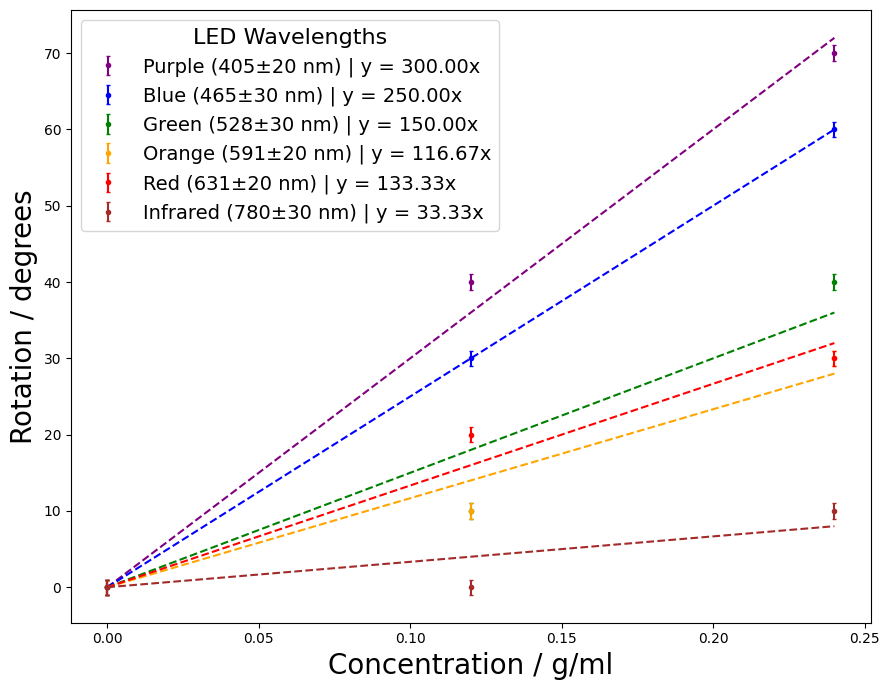

In [ ]:
def linear_fit(x, slope):
    return slope * x


plt.figure(figsize=(9, 7), layout="tight")

dataframes = [purple, blue, green, orange, red, infRed]

for df, color, name in zip(dataframes, ['purple', 'blue', 'green', 'orange', 'red', 'brown'],
                            ['Purple (405±20 nm)', 'Blue (465±30 nm)', 'Green (528±30 nm)', 'Orange (591±20 nm)', 'Red (631±20 nm)', 'Infrared (780±30 nm)']):

    popt, _ = curve_fit(linear_fit, df['Concentration'], df['Rotation'])

    plt.errorbar(df['Concentration'], df['Rotation'], color=color, label=name + f' | y = {popt[0]:.2f}x', yerr=1, fmt='.', capsize=1.5)

    # Fit a line through the origin using curve_fit

    plt.plot(df['Concentration'], linear_fit(df['Concentration'], *popt), '--', color=color)


plt.xlabel('Concentration / g/ml', fontsize=20)
plt.ylabel('Rotation / degrees', fontsize=20)
plt.legend(title='LED Wavelengths', fontsize=14, title_fontsize=16)

plt.savefig('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Data_Processing/Concentration_Rotation.png', dpi=300)

plt.show()


Parameter Errors for Purple (405±20 nm): slope = 1.18e+01
Parameter Errors for Blue (465±30 nm): slope = 0.00e+00
Parameter Errors for Green (528±30 nm): slope = 2.36e+01
Parameter Errors for Orange (591±20 nm): slope = 1.18e+01
Parameter Errors for Red (631±20 nm): slope = 1.18e+01
Parameter Errors for Infrared (780±30 nm): slope = 1.18e+01


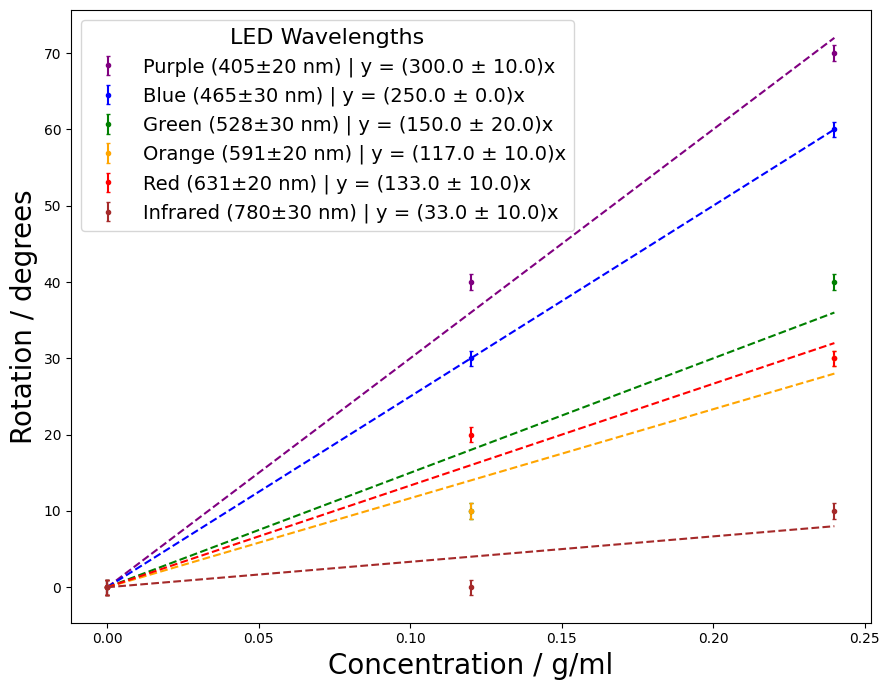

In [12]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def linear_fit(x, slope):
    return slope * x

plt.figure(figsize=(9, 7), tight_layout=True)  # Use tight_layout for automatic layout adjustment

dataframes = [purple, blue, green, orange, red, infRed]

for df, color, name in zip(dataframes, ['purple', 'blue', 'green', 'orange', 'red', 'brown'],
                            ['Purple (405±20 nm)', 'Blue (465±30 nm)', 'Green (528±30 nm)', 'Orange (591±20 nm)', 'Red (631±20 nm)', 'Infrared (780±30 nm)']):
    popt, pcov = curve_fit(linear_fit, df['Concentration'], df['Rotation'])

    # Extract standard deviations (errors) from the diagonal of the covariance matrix
    popt_err = pcov.diagonal() ** 0.5

    # Print the errors
    print(f"Parameter Errors for {name}: slope = {popt_err[0]:.2e}")

    # Plotting with error bars
    plt.errorbar(df['Concentration'], df['Rotation'], color=color, label=name + f' | y = ({round(popt[0],0)} ± {round(popt_err[0],-1)})x', yerr=1, fmt='.', capsize=1.5)

    # Fit a line through the origin using curve_fit
    plt.plot(df['Concentration'], linear_fit(df['Concentration'], *popt), '--', color=color)

plt.xlabel('Concentration / g/ml', fontsize=20)
plt.ylabel('Rotation / degrees', fontsize=20)
plt.legend(title='LED Wavelengths', fontsize=14, title_fontsize=16)

plt.savefig('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Data_Processing/Concentration_Rotation.png', dpi=300)

plt.show()
